# Sales Commission Calculation (Monte Carlo)

We will try to predict how much money we should budget for sales commissions for the next year using Monte Carlo simulation. This problem is useful for modeling because we have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments.

There are two components to running a Monte Carlo simulation:

- the equation to evaluate
- the random variables for the input

In [1]:
# IMports
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

For this model, we will use a random number generation from numpy. The handy aspect of numpy is that there are several random number generators that can create random samples based on a predefined distribution.

Let's assume our historical percent to target performance is centered around a a mean of 100% and standard deviation of 10%. Let’s define those variables as well as the number of sales reps and simulations we are modeling:

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [4]:
# generate random actual percentages over target sales based on given variables
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

Here is how first 10 percentages look like:

In [5]:
pct_to_target[:10]

array([0.93, 0.87, 0.96, 1.13, 0.97, 1.15, 0.9 , 1.01, 0.86, 1.11])

Let's assume our actual target sales follow a uniform distribution with lower probability rates for some of the values. So we can simulate how different distributions could be incorporated into our model.

In [6]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [7]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [8]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,0.93,100000,93000.0
1,0.87,75000,65250.0
2,0.96,100000,96000.0
3,1.13,300000,339000.0
4,0.97,100000,97000.0


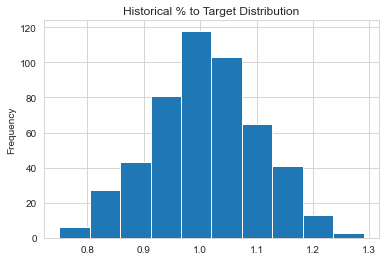

In [23]:
# Plot % to Target distribution for prior years
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution');

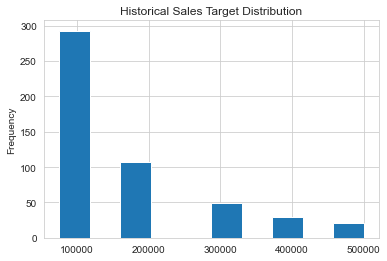

In [21]:
# Plot Sales Target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution');

Commission Rate Table:
![comm](./commissions.png)

In [9]:
def calc_commission_rate(x):

    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [10]:
# create commission rate and multiply it by sales
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [11]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [12]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [14]:
# Histogram

results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,780,002.0","2,861,691.0","83,762,575.0"
std,"2,641,761.0","102,012.0","2,592,717.0"
min,"73,057,250.0","2,480,290.0","73,125,000.0"
25%,"81,999,000.0","2,796,926.0","82,100,000.0"
50%,"83,792,125.0","2,858,714.0","83,700,000.0"
75%,"85,471,875.0","2,927,998.0","85,450,000.0"
max,"91,569,000.0","3,212,112.0","91,725,000.0"


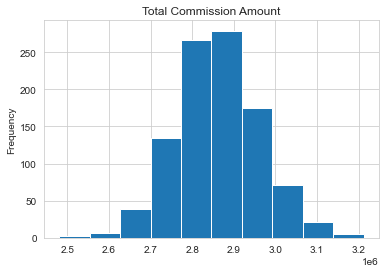

In [24]:
# Plot total commission amount distribution
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount");

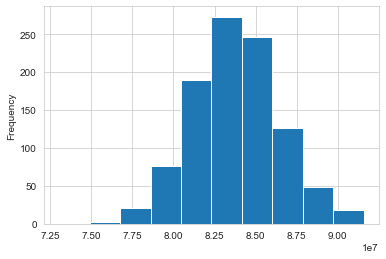

In [25]:
# Plot Sales distribution
results_df['Sales'].plot(kind='hist');